# Capítulo 3

Nesse capítulo, vamos usar Python para rodar os métodos lineares do capítulo 3.

## 3.6.1 Pacotes e dados

Vamos começar importando os pacotes que usaremos nessa sessão, bem como os dados. É possível importar pacotes de maneiras distintas: (i) `import numpy as np`; (ii) `import numpy`; (iii) `from numpy import *`; e (iv) from `numpy.subpackage import function`. No primeiro caso, importamos todas as funções no pacote Numpy, mas usamos np como o objeto onde essas funções podem ser acessadas (e.g., `np.random.normal(0, 1, 10)`); no segundo, o objeto é numpy (e.g., `numpy.random.normal(0, 1, 10)`); no terceiro, as funções são importadas diretamente (e.g., `random.normal(0, 1, 10)`) e no quarto só a função especificada é importada (diretamente; e.g., `from numpy.random import normal(0, 1, 10)`).

Se algum desses pacotes estiver faltando, você receberá um erro. Nesse caso, volte ao terminal, ative seu ambiente `ml` no conda, e instale o pacote. Por exemplo, `conda install -c conda-forge patsy`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
# from patsy import dmatrices

In [2]:
boston = pd.read_csv('../data/Boston.csv', header=0, index_col=0)

## 3.6.2 Regressão linear simples

Vamos começar analisando os dados que acabamos de abrir.

In [3]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [4]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [5]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
boston.shape

(506, 13)

Há diferentes maneiras de rodar uma regressão linear em Python. O pacote mais popular de machine learning é o sklearn, que tem uma quantidade enorme de modelos implementados, como veremos ao longo do curso. Como ele é bem geral, algumas informações específicas de cada modelo, como p-valores, não são automaticamente calculados. Por isso, vamos usar outro pacote que traz esse tipo de informação estatística, o `statsmodels`.

In [7]:
lm = smf.ols('medv~lstat', data = boston).fit()

In [8]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           5.08e-88
Time:                        06:48:56   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

Aqui, `lm` é um objeto retornado pela função `ols`. Para saber quais são os métodos que esse objeto contém, podemos investigar seu diretório com `dir(lm)`. Por convenção de Python, métodos que começam com `_` não são para serem acessados diretamente por usuários (ou seja, são métodos que têm alguma utilidade interna do pacote, e que pode interferir com o seu funcionamento se for alterado por um usuário).

In [9]:
dir(lm)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 

In [10]:
print(lm.params)

Intercept    34.553841
lstat        -0.950049
dtype: float64


O que seria o método conf_int?

In [11]:
lm.conf_int?

Signature: lm.conf_int(alpha=0.05, cols=None)
Docstring:
conf_int(self, alpha=0.05, cols=None)

Compute the confidence interval of the fitted parameters.

Parameters
----------
alpha : float, optional
    The `alpha` level for the confidence interval. The default
    `alpha` = .05 returns a 95% confidence interval.
cols : array_like, optional
    Columns to include in returned confidence intervals.

Returns
-------
array_like
    The confidence intervals.

Notes
-----
The confidence interval is based on Student's t-distribution.
File:      /opt/homebrew/Caskroom/miniconda/base/envs/ml2024/lib/python3.10/site-packages/statsmodels/regression/linear_model.py
Type:      method

In [12]:
print(lm.conf_int())

                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


Como fazer previsões para dados novos? Por exemplo, se x=5 ou x=10 ou x=15? Basta passá-los para o método`predict`.

In [13]:
lm.predict(pd.DataFrame({'lstat':[5, 10, 15]}))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

Também podemos plotar os pontos junto com a linha de regressão. Isso é feito usando matplolib, como da última vez. Para desenhar a linha, basta pegar os pontos extremos de X e usar suas previsões (quaisquer outros dois pontos também serviriam).

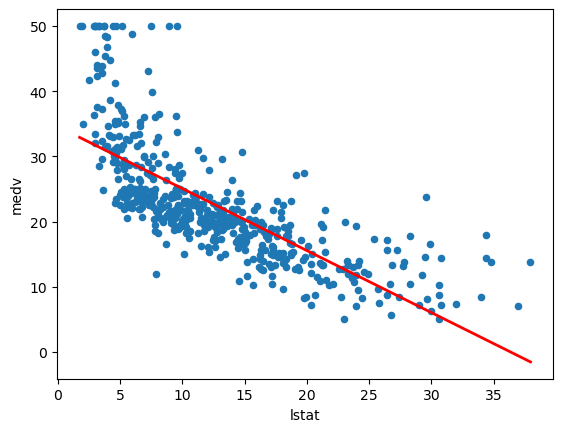

In [14]:
X_new = pd.DataFrame({'lstat': [boston.lstat.min(), boston.lstat.max()]})
preds = lm.predict(X_new)
boston.plot(kind='scatter', x='lstat', y='medv')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

Será que a linha de fato é um bom fit para os dados? Uma maneira de estudar a questão é ver como os resíduos se comportam. Idealmente, os resíduos seriam distribuídos de maneira aleatória no entorno de zero.

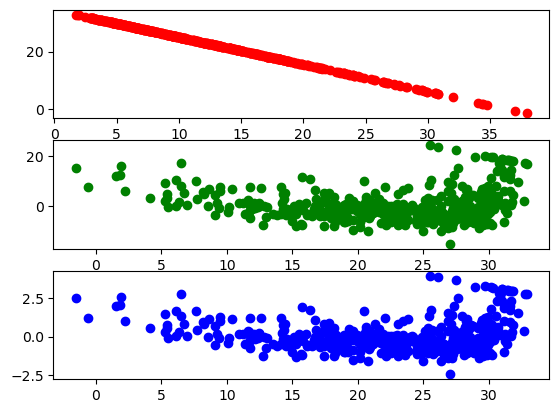

In [15]:
fig, ((ax1, ax2, ax3))= plt.subplots(3, 1)
ax1.plot(boston.lstat, lm.predict(),'ro')
ax2.plot(lm.predict(), lm.resid, 'go')
ax3.plot(lm.predict(), lm.resid_pearson, 'bo')
plt.show()

In [16]:
lm.resid?

Type:        Series
String form:
1      -5.822595
           2      -4.270390
           3       3.974858
           4       1.639304
           5       6.709922
           ... <...> 4
           503    -5.327393
           504    -5.295563
           505    -6.397521
           506   -15.167452
           Length: 506, dtype: float64
Length:      506
File:        /opt/homebrew/Caskroom/miniconda/base/envs/ml2024/lib/python3.10/site-packages/pandas/core/series.py
Docstring:  
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. Th

Vemos acima que há alguma evidência de não-linearidade. Os valores do meio estão consistentemente abaixo da linha, e os valores extremos, acima.

Quem são os pontos que têm o maior efeito na linha de regressão? Isso costuma ser uma boa medida para detectar outliers. A coleção de métodos capazes de identificar esses efeitos está em `lm.get_influence()`. Vamos ver quais são nossas opções.

In [17]:
dir(lm.get_influence())

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_drop_vari',
 '_ols_xnoti',
 '_plot_index',
 '_res_looo',
 'aux_regression_endog',
 'aux_regression_exog',
 'cooks_distance',
 'cov_ratio',
 'det_cov_params_not_obsi',
 'dfbeta',
 'dfbetas',
 'dffits',
 'dffits_internal',
 'endog',
 'ess_press',
 'exog',
 'get_resid_studentized_external',
 'hat_diag_factor',
 'hat_matrix_diag',
 'influence',
 'k_vars',
 'model_class',
 'nobs',
 'params_not_obsi',
 'plot_index',
 'plot_influence',
 'resid',
 'resid_press',
 'resid_std',
 'resid_studentized',
 'resid_studentized_external',
 'resid_studentized_internal',
 'resid_var',
 'results',
 'scale',
 'sigma2_not_obsi',
 'summary_

Por exemplo, vamos identificar o ponto de leverage máximo.

In [18]:
np.argmax(lm.get_influence().hat_matrix_diag)

374

De fato, visualizando os leverages versus os resíduos, vemos que a entrada 374 é máxima, mas há outras que estão perto também. Note que no livro o ponto de leverage máximo é 375, pois R conta a partir de 1 e Python de 0.

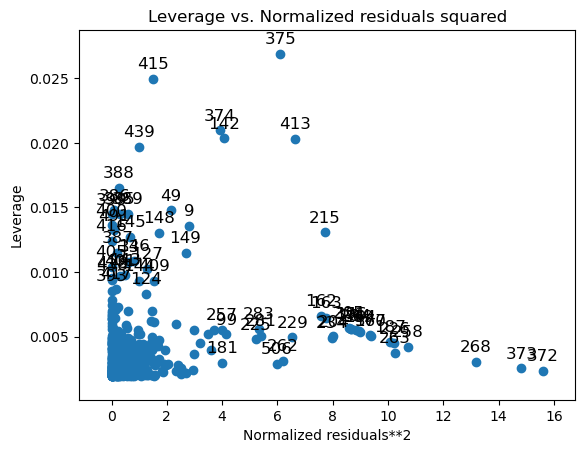

In [19]:
plot_leverage_resid2(lm);

Por último, como mencionamos acima, um outro pacote importante para machine learning em Python é o scikit-learn. Ele contém menos informações estatística, mas funciona para vários modelos além de regressão linear.

Aqui está um exemplo da simplicidade do scikit-learn.

In [20]:
X = pd.DataFrame(boston.lstat)
y = boston.medv
print(X.shape)

model = linear_model.LinearRegression()
model.fit(X, y)
print(f"Valor do intecepto: {model.intercept_}")
print(f"Valor do coeficiente: {model.coef_}")

(506, 1)
Valor do intecepto: 34.55384087938311
Valor do coeficiente: [-0.95004935]


## 3.6.3 Regressão linear múltipla

Podemos usar os mesmos comandos para rodar uma regressão linear múltipla.

In [21]:
boston?

Type:        DataFrame
String form:
crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
           1    0.00632  18.0   2.3 <...> 0   5.64  23.9
           505     21.0   6.48  22.0
           506     21.0   7.88  11.9
           
           [506 rows x 13 columns]
Length:      506
File:        /opt/homebrew/Caskroom/miniconda/base/envs/ml2024/lib/python3.10/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index 

In [22]:
lm = smf.ols('medv~lstat+age', data = boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           2.98e-88
Time:                        06:48:56   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

E se quisermos usar todas as variáveis em `boston` menos a variável de resposta `medv`?

In [23]:
# features_to_use = []
# for feature in boston.columns:
#     if feature != "medv":
#         features_to_use.append(feature)
features_to_use = [feature for feature in boston.columns if feature != "medv"]
print(features_to_use)

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']


In [24]:
formula = "medv~" + "+".join(features_to_use)
print(formula)

medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat


In [25]:
lm = smf.ols(formula, data=boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.23e-133
Time:                        06:48:56   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

In [26]:
X = boston.drop(["medv"], axis=1)  # Since statsmodels automatically adds intercept
X["Intercept"] = 1
y = boston["medv"]

for i, column_name in enumerate(X.columns):
    print(f"{column_name}: {variance_inflation_factor(X, i)}")

crim: 1.767485915431012
zn: 2.2984589077358097
indus: 3.9871806307570994
chas: 1.0711677737584038
nox: 4.369092622844795
rm: 1.9125324374368868
age: 3.0882320397311966
dis: 3.954036641628298
rad: 7.445300760069844
tax: 9.002157663471797
ptratio: 1.7970595931297797
lstat: 2.8707765008417505
Intercept: 535.5266192987414


## 3.6.4 Interações

Para criar interações, basta usar a notação "feature1 * feature2". Isso equivale a criar uma nova feature cujo valor é a multiplicação das duas features. Note que o statsmodels automaticamente inclui as features feature1 e feature2 também, por conta do princípio da hierarquia.

In [27]:
lm = smf.ols('medv~lstat * age', data=boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           4.86e-88
Time:                        06:48:56   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## 3.6.5 Transformações não-lineares dos previsores

Apesar de estarmos fitando uma regressão linear, é possível usar transformações não-lineares com os pacotes apresentados. Nossa regressão linear usual toma a seguinte forma.

In [28]:
lm_order1 = smf.ols('medv ~ lstat', data=boston).fit()
print(lm_order1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           5.08e-88
Time:                        06:48:56   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

Mas agora suponha que queiramos incluir um termo quadrático, `lstat**2`. Isso pode ser feito usando a função especial `I()`, de tal maneira que `I(lstat ** 2.0)` indica que, além de `lstat`, vamos incluir `lstat**2` na regressão.

In [29]:
lm_order2 = smf.ols('medv~ lstat+ I(lstat ** 2.0)', data=boston).fit()
print(lm_order2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.56e-112
Time:                        06:48:56   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          42.8620      0.872     

Será que adicionar esse termo quadrático melhora o fit? Vamos olhar novamente para os resíduos sem o termo adicional.

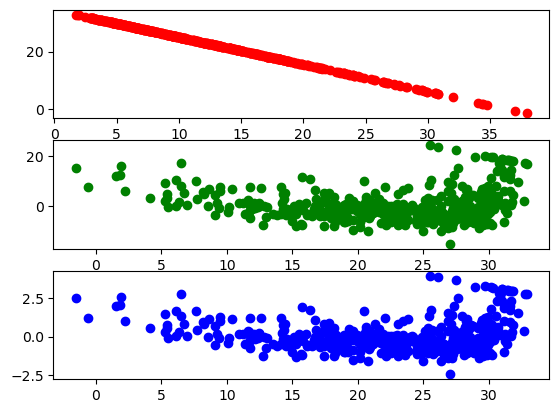

In [30]:
fig, ((ax1, ax2, ax3))= plt.subplots(3, 1)
ax1.plot(boston.lstat, lm_order1.predict(),'ro')
ax2.plot(lm_order1.predict(), lm_order1.resid, 'go')
ax3.plot(lm_order1.predict(), lm_order1.resid_pearson, 'bo')
plt.show()

De fato, os resíduos parecem estar mais concentrados no entorno de zero, indicando que o fit melhorou com a adição do termo quadrático. 

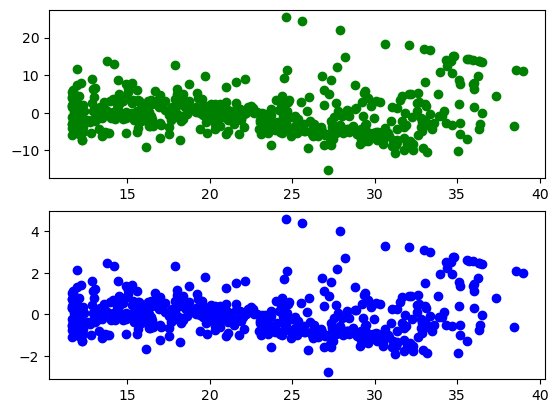

In [31]:
fig, ((ax1, ax2))= plt.subplots(2, 1)
ax1.plot(lm_order2.predict(), lm_order2.resid, 'go')
ax2.plot(lm_order2.predict(), lm_order2.resid_pearson, 'bo')
plt.show()

Podemos usar um teste de hipótese F para mostrar que o modelo com `lstats**2` é melhor. A hipótese nula é de que os dois modelos fitam os dados igualmente bem; a hipótese alternativa é de que o modelo com mais previsores é melhor. Como a estatística F é 135 e o p-valor é mínimo, temos evidência para rejeitar a hipótese nula. 

In [32]:
table = sm.stats.anova_lm(lm_order1, lm_order2)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


Não estamos restritos a usar apenas potências dos previsores. Por exemplo, podemos considerar uma regressão usando o log da feature `rm`.

In [33]:
lm_log = smf.ols('medv~ np.log(rm)', data=boston).fit()
lm_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           1.22e-64
Time:                        06:48:57   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.6.6 Previsores qualitativos

Para lidar com previsores qualitativos, vamos começar abrindo um dataset novo, e entendendo os dados que estão lá.

In [34]:
carseats = pd.read_csv('../data/Carseats.csv', header=0)

In [35]:
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [36]:
carseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [37]:
carseats.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


Vamos rodar uma regressão linear múltipla com os previsores quantitativos.

In [38]:
lm_carseats = smf.ols('Sales ~ Income + Advertising + Price + Age + US', data = carseats).fit()

In [39]:
lm_carseats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     46.46
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           1.08e-37
Time:                        06:48:57   Log-Likelihood:                -889.66
No. Observations:                 400   AIC:                             1791.
Df Residuals:                     394   BIC:                             1815.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.1761      0.780     19.466      0.000      13.643      16.709
US[T.Yes]       0.0424      0.324      0.131      0.896      -0.595       0.680
Income          0.0107      0.004      2.645      0.008       0.003       0.019
Advertising     0.1182      0.023      5.079      0.000       0.072       0.164
Price          -0.0573      0.005    -11.911      0.000      -0.067      -0.048
Age            -0.0487      0.007     -6.948      0.000      -0.062      -0.035
==============================================================================
Omnibus:                        3.233   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                3.284
Skew:                           0.217   Prob(JB):                        0.194
Kurtosis:                       2.902   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Para começar a usar previsores quantitativos na regressão, primeiro precisamos criar dummies, ou seja, uma variável que é 1 quando a observação tem uma certa categoria e zero caso contrário. Para garantir que não tenhamos colinearidade perfeita, vamos excluir a primeira coluna, que vai servir de base.

In [40]:
shelveloc_dummies = pd.get_dummies(carseats.ShelveLoc, prefix='ShelveLoc').iloc[:,1:]
carseats_dummy = pd.concat([carseats, shelveloc_dummies], axis=1)
carseats_dummy.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,False,False
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,True,False
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,False,True
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,False,True
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,False,False


Dessa maneira, podemos incluir as dummies na regressão.

In [41]:
lm_carseats_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + ShelveLoc_Good + ShelveLoc_Medium', 
                            data = carseats_dummy).fit()
lm_carseats_dummy.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.33e-101
Time:                        06:48:57   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   13.4006      0.545     24.575      0.000      12.329      14.473
ShelveLoc_Good[T.True]       4.8756      0.230     21.175      0.000       4.423       5.328
ShelveLoc_Medium[T.True]     2.0046      0.189     10.590      0.000       1.632       2.377
Income                       0.0136      0.003      4.891      0.000       0.008       0.019
Advertising                  0.1057      0.012      9.076      0.000       0.083       0.129
Price                       -0.0606      0.003    -18.436      0.000      -0.067      -0.054
Age                         -0.0498      0.005    -10.401      0.000      -0.059      -0.040
==============================================================================
Omnibus:                        0.402   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.422
Skew:                           0.076   Prob(JB):                        0.810
Kurtosis:                       2.955   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Podemos ver, por exemplo, que um ShelveLoc médio aumenta a previsão em 2 unidades versus um baixo. Um ShelveLoc alto aumenta ainda mais, em 4.88.

Uma outra alternativa, que evita criar os dummies explicitamente, é usar o código `C(ShelveLoc)`.

In [42]:
lm_carseats_wo_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + C(ShelveLoc) + C(US)', 
                            data = carseats).fit()
lm_carseats_wo_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     135.4
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.67e-100
Time:                        06:48:57   Log-Likelihood:                -736.54
No. Observations:                 400   AIC:                             1489.
Df Residuals:                     392   BIC:                             1521.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13.4126      0.547     24.502      0.000      12.336      14.489
C(ShelveLoc)[T.Good]       4.8768      0.231     21.152      0.000       4.423       5.330
C(ShelveLoc)[T.Medium]     2.0017      0.190     10.550      0.000       1.629       2.375
C(US)[T.Yes]              -0.0667      0.222     -0.300      0.764      -0.504       0.370
Income                     0.0136      0.003      4.894      0.000       0.008       0.019
Advertising                0.1089      0.016      6.835      0.000       0.078       0.140
Price                     -0.0605      0.003    -18.385      0.000      -0.067      -0.054
Age                       -0.0498      0.005    -10.379      0.000      -0.059      -0.040
==============================================================================
Omnibus:                        0.383   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.418
Skew:                           0.074   Prob(JB):                        0.811
Kurtosis:                       2.944   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.6.7 Escrevendo funções

Na medida em que começarmos a escrever códigos mais complexos, é útil saber escrever nossas próprias funções, ao invés de depender dos pacotes de outras pessoas. Em Python, escrever uma função é muito simples. Basta usar a palavra especial "def", colocar o nome da função e os argumentos, e definir embaixo o procedimento da função (usando "return" para retornar algum objeto, se necessário).

Por exemplo, vamos escrever uma função que soma dois números, imprime se a soma é maior do que cinco, e retorna a soma.

In [43]:
def is_sum_greater_than_five(number1, number2):
    total = number1 + number2
    if total > 5:
        print("Sum is greater than five.")
    else:
        print("Sum is equal to or less than five.")
    return total

In [44]:
is_sum_greater_than_five(2, 2)

Sum is equal to or less than five.


4

In [45]:
is_sum_greater_than_five(2, 7)

Sum is greater than five.


9

Como exemplo de uma função mais complicada, vamos ler o dataset `carseats`, checar quais features têm variáveis qualitativas e transformá-las em dummies.

In [46]:
carseats = pd.read_csv('../data/Carseats.csv', header=0)

In [47]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [48]:
def load_dataset_with_dummies(dataset_name):
    if dataset_name == "Carseats":
        data = pd.read_csv(f"../data/Carseats.csv")
        qualitative_features = ["ShelveLoc", "Urban", "US"]
    elif dataset_name == "College":
        data = pd.read_csv(f"../data/College.csv", index_col=0)
        qualitative_features = ["Private"]
    else:
        raise NotImplementedError("only datasets Carseats and College have been implemented.")
        
    for qualitative_feature in qualitative_features:
        dummies = pd.get_dummies(data[qualitative_feature], prefix=qualitative_feature).iloc[:,1:]
        data = pd.concat([data.drop(qualitative_feature, axis=1), dummies], axis=1)
    return data

In [49]:
df = load_dataset_with_dummies("College")
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,True
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,True
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,True
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,True
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,True
